<a href="https://colab.research.google.com/github/tomiambro/covid_transfer_learning/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# ! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
!pip install --upgrade git+https://github.com/fastai/fastai.git &> 2
!pip install pip install nbdev &> 2

In [7]:
from fastai.vision.all import *
from torchvision import transforms as T

In [8]:
dataset_path = 'gdrive/MyDrive/machine_learning/datasets/covid_dataset'  #change dir to your project folder
folder_path = 'gdrive/MyDrive/machine_learning/covid/'

In [9]:
from google.colab import drive

drive._mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


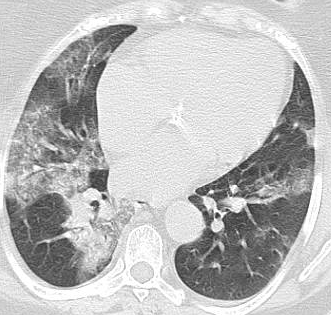

In [10]:
im = Image.open(f"{dataset_path}/COVID/Covid (1000).png")
im.to_thumb(350,350)

Create array with Path objects to imgs

In [11]:
path = Path(f"{dataset_path}")
fns = get_image_files(path)
fns

(#2481) [Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1227).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1229).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1226).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1209).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1238).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1233).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1205).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1220).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1216).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1223).png')...]

In [12]:
imgs = get_image_files(f"{dataset_path}")
imgs

(#2481) [Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1227).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1229).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1226).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1209).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1238).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1233).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1205).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1220).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1216).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1223).png')...]

In [13]:
covid = DataBlock(
    blocks=(ImageBlock, CategoryBlock(['non-COVID', 'COVID'], sort=False)), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(350,350))

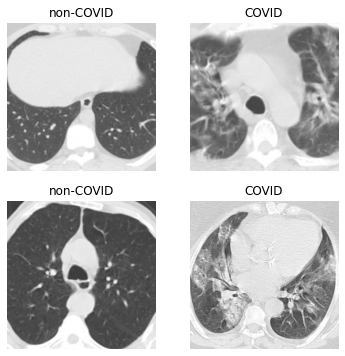

In [14]:
dls = covid.dataloaders(path)
dls.valid.show_batch(max_n=4)

In [15]:
dls.train.vocab

['non-COVID', 'COVID']

In [16]:
res18 = cnn_learner(dls, resnet18, metrics=[F1Score(), Recall()], path=folder_path)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [17]:
lr = 1e-3
res18.fine_tune(3, lr)

epoch,train_loss,valid_loss,f1_score,recall_score,time
0,0.767193,0.597272,0.740741,0.658436,02:18


epoch,train_loss,valid_loss,f1_score,recall_score,time
0,0.442513,0.274866,0.865096,0.831276,00:38
1,0.311280,0.214899,0.911765,0.893004,00:37
2,0.230923,0.198640,0.925690,0.897119,00:37


In [18]:
df_rec18 = pd.DataFrame(res18.recorder.values, columns=['train_loss', 'valid_loss', 'f1_score', 'recall_score'])

In [19]:
df_rec18

,train_loss,valid_loss,f1_score,recall_score
0,0.442513,0.274866,0.865096,0.831276
1,0.311280,0.214899,0.911765,0.893004
2,0.230923,0.198640,0.925690,0.897119


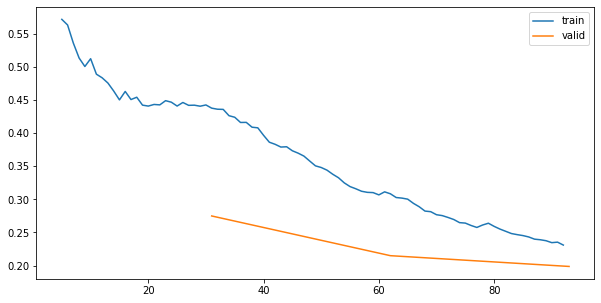

In [20]:
plt.figure(figsize=(10,5))
res18.recorder.plot_loss()

In [21]:
res18.recorder.values[-1][2]

0.9256900212314225

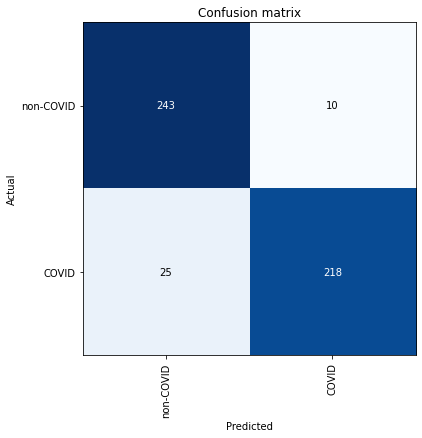

In [22]:
interp = ClassificationInterpretation.from_learner(res18)
interp.plot_confusion_matrix(figsize=(6,6))

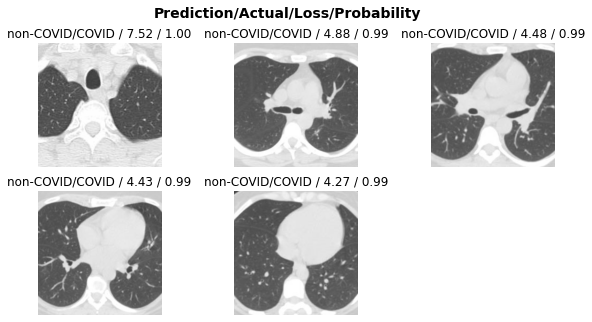

In [23]:
interp.plot_top_losses(5, figsize=(10,5))

In [24]:
res18.export('res18.pkl')

In [25]:
res18.predict(f"{dataset_path}/COVID/Covid (1000).png")

('COVID', TensorBase(1), TensorBase([3.1325e-06, 1.0000e+00]))

In [26]:
res34 = cnn_learner(dls, resnet34, metrics=[F1Score(), Recall()], path=folder_path)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [27]:
lr = 1e-3
res34.fine_tune(5, lr)

epoch,train_loss,valid_loss,f1_score,recall_score,time
0,0.908277,0.438396,0.811966,0.781893,00:43


epoch,train_loss,valid_loss,f1_score,recall_score,time
0,0.417067,0.376360,0.858169,0.983539,00:57
1,0.288618,0.161477,0.944000,0.971193,00:56
2,0.183895,0.137023,0.955466,0.971193,00:57
3,0.112010,0.098618,0.962963,0.962963,00:57
4,0.074382,0.094470,0.966805,0.958848,00:57


In [28]:
df_rec34 = pd.DataFrame(res34.recorder.values, columns=['train_loss', 'valid_loss', 'f1_score', 'recall_score'])

In [29]:
df_rec34

,train_loss,valid_loss,f1_score,recall_score
0,0.417067,0.376360,0.858169,0.983539
1,0.288618,0.161477,0.944000,0.971193
2,0.183895,0.137023,0.955466,0.971193
3,0.112010,0.098618,0.962963,0.962963
4,0.074382,0.094470,0.966805,0.958848


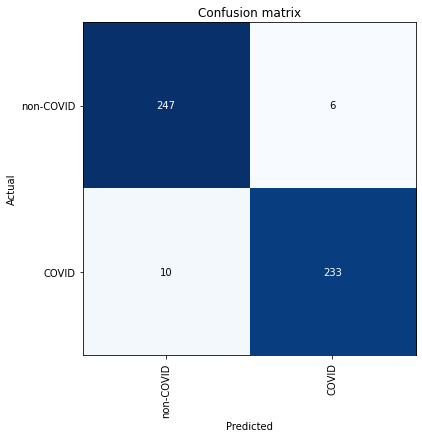

In [30]:
interp = ClassificationInterpretation.from_learner(res34)
interp.plot_confusion_matrix(figsize=(6,6))

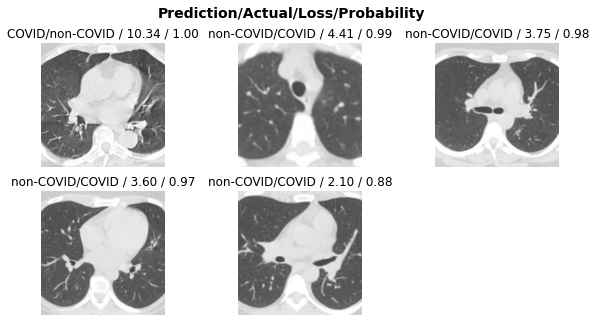

In [31]:
interp.plot_top_losses(5, figsize=(10,5))

## Inference

Load the model from URL

In [32]:
res34.export('res34.pkl')
!ls {folder_path}

export.pkl  models  res18.pkl  res34.pkl


In [33]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=151TwzuC8exmzntoh-iQDXPJT71A1CcGU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=151TwzuC8exmzntoh-iQDXPJT71A1CcGU" -O res34.pkl && rm -rf /tmp/cookies.txt &> 2

--2021-12-13 01:53:35--  https://docs.google.com/uc?export=download&confirm=JjZh&id=151TwzuC8exmzntoh-iQDXPJT71A1CcGU
Resolving docs.google.com (docs.google.com)... 172.217.212.100, 172.217.212.101, 172.217.212.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-5g-docs.googleusercontent.com/docs/securesc/p7mlquppn1nna8v4lkj49o6lb6qnip4o/rd15tp64rfh88g9cbc5lg9vhbg4371d2/1639360350000/05955112456020216338/00435299790202694079Z/151TwzuC8exmzntoh-iQDXPJT71A1CcGU?e=download [following]
--2021-12-13 01:53:35--  https://doc-0c-5g-docs.googleusercontent.com/docs/securesc/p7mlquppn1nna8v4lkj49o6lb6qnip4o/rd15tp64rfh88g9cbc5lg9vhbg4371d2/1639360350000/05955112456020216338/00435299790202694079Z/151TwzuC8exmzntoh-iQDXPJT71A1CcGU?e=download
Resolving doc-0c-5g-docs.googleusercontent.com (doc-0c-5g-docs.googleusercontent.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connec

In [34]:
!ls -la

total 85480
drwxr-xr-x 1 root root     4096 Dec 13 01:53 .
drwxr-xr-x 1 root root     4096 Dec 13 01:38 ..
-rw-r--r-- 1 root root        0 Dec 13 01:53 2
drwxr-xr-x 4 root root     4096 Dec  3 14:33 .config
drwx------ 6 root root     4096 Dec 13 01:41 gdrive
-rw-r--r-- 1 root root 87510221 Dec 13 01:53 res34.pkl
drwxr-xr-x 1 root root     4096 Dec  3 14:33 sample_data


In [36]:
vgg16 = cnn_learner(dls, vgg16_bn, metrics=[F1Score(), Recall()], path=folder_path)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [37]:
lr = 1e-3
vgg16.fine_tune(5, lr)

epoch,train_loss,valid_loss,f1_score,recall_score,time


RuntimeError: ignored

In [ ]:
covid = covid.new(
    item_tfms=Resize(350),
    batch_tfms=[DeterministicFlip, RandomErasing(p=.5, sh=.1)])
dls = covid.dataloaders(path)

In [ ]:
train_features, train_labels = next(iter(dls.train))
trans = T.ToPILImage()
trans(train_features[0])

In [ ]:
torch.cuda.empty_cache()

In [ ]:
class Ensemble:
  def __init__(self, models : dict, vocab : list = [0, 1]):
    self.models = models
    self.vocab = vocab
    print(f'vocab: {self.vocab}')
    for name, value in models.items():
      print(f'loaded: {name}')
  
  def calc_probas(self, item):
    probas = []
    for _, model in self.models.items():
      _, _, p = model.predict(item)
      probas.append(p.numpy())
    
    probas = np.stack(probas, axis=0)
    return probas

  def predict(self, item):
    probas = self.calc_probas(item)
    mean, std = probas.mean(axis=0), probas.std(axis=0)

    return self.vocab[mean.argmax()], mean, std
  
  def validate_ensemble(self, dl):
    


In [ ]:
en = Ensemble({'res18': res18, 'res34': res34}, vocab=['non-covid', 'covid'])
pred, mean, std = en.predict(f"{dataset_path}/COVID/Covid (1000).png")
pred, (mean*100).round(3), std.mean()

In [ ]:
print(f'{en.vocab[mean.argmax()]} with {(mean[mean.argmax()] * 100):.3f}% probability')

In [ ]:
en.calc_probas(f"{dataset_path}/COVID/Covid (1000).png")